In [364]:
import cv2

from PIL import Image
import pytesseract

# image = Image.open('sb/1.jpg')
# print(type(image))
# text = pytesseract.image_to_string(image)
# print(text)

# image_path = "sb/test/images/4.jpg"
# file_path = "sb/test/annotations/4.txt"

image_path = "sb/9.jpg"
file_path = "sb/annotations/9.txt"



In [365]:
import cv2
import numpy as np
from img_classify import classify_image 
from PIL import Image
import pytesseract
import matplotlib.pyplot as plt

def rescaleFrame(frame, scale = 1.25):
    height = int(frame.shape[0] * scale)
    width = int(frame.shape[1] * scale)
    dimensions = (width, height)
    return cv2.resize(frame,dimensions,interpolation = cv2.INTER_AREA)

def last_i(edges, i, l, r, n, m):
    if (l < 0 or r >= m):
        return 0
    for k in range(l, r, 1):
        if (edges[i][k] > 0):
            return 0
    return 1

def last_j(edges, j, l, r, n, m):
    if (l < 0 or r >= n):
        return 0
    for k in range(l, r, 1):
        if (edges[k][j] > 0):
            return 0
    return 1


def find_axes(image_path):
    # Load image
    image = cv2.imread(image_path)
    # blur_image = cv2.GaussianBlur(image, (3, 3), 0)
    blur_image = 0
    gray = cv2.cvtColor(image - blur_image, cv2.COLOR_BGR2GRAY)
    #gray = rescaleFrame(gray)

    # Edge detection
    n, m = gray.shape
    edges = cv2.Canny(gray, 40, 40)
    print((n, m))
    print(edges[100:120, 100:120])
    cv2.imshow("FUCK", rescaleFrame(edges, 1.5))

    lines = list()
    Threshold = m // 3
    gap = 10
    cont = 8
    segments = 3
    for i in range(n - 1, 0, -1):
        cnt_tot = 0
        max_tot = 0

        cnt_cont = 0
        num_cont = 0
        for j in range(m):
            if (last_i(edges, i, j - gap, j, n, m)):
                if cnt_tot > max_tot:
                    max = cnt
                cnt_tot = 0
            else:
                if (edges[i][j] > 0):
                    cnt_tot += 1
                    if cnt_tot > max_tot:
                        max_tot = cnt_tot

            if (edges[i][j] == 0):
                cnt_cont = 0
            else:
                cnt_cont += 1
                if (cnt_cont % cont == 0):
                    num_cont += 1
        if (max_tot > Threshold and num_cont >= segments):
            # print(i)
            # print(max)
            lines.append((i, 0))
            break
    
    Threshold = n // 3
    gap = 10
    cont = 8
    segments = 3
    for j in range(m):
        cnt_tot = 0
        max_tot = 0

        cnt_cont = 0
        num_cont = 0
        for i in range(n):
            if (last_j(edges, j, i - gap, i, n, m)):
                if cnt_tot > max_tot:
                    max = cnt
                cnt_tot = 0
            else:
                if (edges[i][j] > 0):
                    cnt_tot += 1
                    if cnt_tot > max_tot:
                        max_tot = cnt_tot

            if (edges[i][j] == 0):
                cnt_cont = 0
            else:
                cnt_cont += 1
                if (cnt_cont % cont == 0):
                    num_cont += 1
        if (max_tot > Threshold and num_cont >= segments):
            # print(i)
            # print(max)
            lines.append((j, 1))
            break

    print("FUCKFUCK")
    ans = 0
    for i in range(n):
        if edges[i][19] > 0:
            ans += 1
    print(ans)


    # Hough Line Transform
    # lines = cv2.HoughLines(edges, 1, np.pi / 180, 100)
    
    # If no lines are detected, return None
    # if lines is None:
    #     return None

    x_axis = None
    y_axis = None

    # for line in lines:
    #     rho, theta = line[0]
    #     a = np.cos(theta)
    #     b = np.sin(theta)
    #     x0 = a * rho
    #     y0 = b * rho

    #     # Depending on theta value, determine if it's closer to vertical or horizontal
    #     if theta < np.pi / 4 or theta > 3 * np.pi / 4:
    #         # Vertical line, potentially y-axis
    #         y_axis = (x0, y0)
    #     else:
    #         # Horizontal line, potentially x-axis
    #         x_axis = (x0, y0)

    #     # For demonstration, drawing the detected lines
    #     x1 = int(x0 + 1000 * (-b))
    #     y1 = int(y0 + 1000 * (a))
    #     x2 = int(x0 - 1000 * (-b))
    #     y2 = int(y0 - 1000 * (a))
    #     cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)

    for line in lines:
        # rho, theta = line[0]
        # a = np.cos(theta)
        # b = np.sin(theta)
        # x0 = a * rho
        # y0 = b * rho

        # # Depending on theta value, determine if it's closer to vertical or horizontal
        # if theta < np.pi / 4 or theta > 3 * np.pi / 4:
        #     # Vertical line, potentially y-axis
        #     y_axis = (x0, y0)
        # else:
        #     # Horizontal line, potentially x-axis
        #     x_axis = (x0, y0)

        # # For demonstration, drawing the detected lines
        # x1 = int(x0 + 1000 * (-b))
        # y1 = int(y0 + 1000 * (a))
        # x2 = int(x0 - 1000 * (-b))
        # y2 = int(y0 - 1000 * (a))

        a = line[0]
        if (line[1] == 1):
            x1 = a
            x2 = a
            y1 = 0
            y2 = n - 1
            # print(x1, y1, x2, y2)
        else:
            y1 = a
            y2 = a
            x1 = 0
            x2 = m - 1
        cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)
        # cv2.line(edges, (x1, y1), (x2, y2), (0, 0, 255), 2)

    # Show the resulting image with detected lines
    # cv2.imshow("Detected Axes", image)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()

    x_axis = lines[0][0]
    y_axis = lines[1][0]

    return x_axis, y_axis

# x_axis, y_axis = find_axes(image_path)
# print(x_axis, y_axis)


vertical_bar


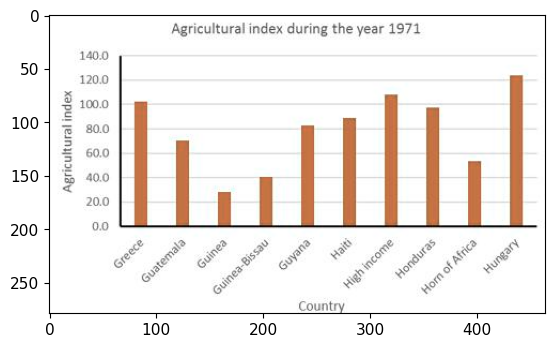

In [366]:
plt.imshow(cv2.imread(image_path))
print(classify_image(image_path))

In [385]:
def draw(image_path, file_path):
    image = cv2.imread(image_path)
    h, w = image.shape[:2]
    annotations = get_annotations(file_path)
    # print(annotations)
    n = annotations.shape[0]
    # print(n)
    # max = 0
    # maxi = -1
    for i in range(n): 
        annotations[i, 1] *= w
        annotations[i, 3] *= w
        annotations[i, 2] *= h
        annotations[i, 4] *= h
    for i in range(n):
        # if (annotations[i, 2] > max and annotations[i, 2] <= 0.9):
        #     max = annotations[i, 2]
        #     maxi = i
        cv2.rectangle(image, (int(annotations[i, 1] - annotations[i, 3] / 2), int(annotations[i, 2] - annotations[i, 4] / 2)), (int(annotations[i, 1] + annotations[i, 3] / 2), int(annotations[i, 2] + annotations[i, 4] / 2)), (0, 0, 255), thickness = 2)
    # print(max)
    print(image.shape)
    plt.imshow(image)
    plt.show()
    return image
    # plt.show()
    


(279, 464, 3)


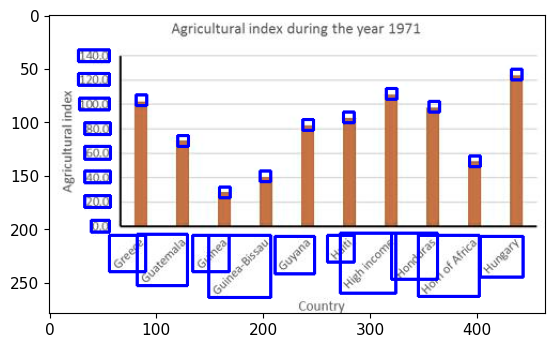

In [386]:
img = draw(image_path, file_path)

In [378]:
# import easyocr
from OCR_Reader import extract_text_from_box

# Initialize the reader using the language model (e.g., 'en' for English)
# reader = easyocr.Reader(['en'])

def get_annotations(file_path):
    # get all annotations from the txt
    ans = list()
    with open(file_path, "r") as file:
        for line in file:
            # Use the split method to separate the string by spaces
            str_list = line.split()
            listt = np.zeros(5)
            for i in range(5):
                listt[i] = np.float64(str_list[i])
            ans.append(listt)
    ans = sorted(ans, key=lambda x : x[0])
    ans = np.array(ans)
    # return ans

    # get all valid annotations
    filtered_ans = list()
    n = ans.shape[0]
    bl_x, bl_y = ans[n - 1, 1] - ans[n - 1, 3] / 2, ans[n - 1, 2] + ans[n - 1, 4] / 2
    if ans[n - 1, 0] == 7:
        flag = 1
    else:
        flag = 0

    X = ans[ans[:, 0] == (0 + flag) % 2]
    X = X[X[:, 1].argsort()]
    x = X.shape[0]
    uX = np.mean(X[:, 2] + X[:, 4] / 2)
    for i in range(x):
        if X[i, 2] - X[i, 4] / 2 <= (uX * x - (X[i, 2] + X[i, 4] / 2)) / (x - 1) and X[i, 2] - X[i, 4] / 2 >= bl_y:
            filtered_ans.append(X[i])

    Y = ans[ans[:, 0] == (1 + flag) % 2]
    Y = Y[Y[:, 2].argsort()]
    y = Y.shape[0]
    uY = np.mean(Y[:, 1] - Y[:, 3] / 2)
    for i in range(y):
        if Y[i, 1] + Y[i, 3] / 2 >= (uY * y - (Y[i, 1] - Y[i, 3] / 2)) / (y - 1) and Y[i, 1] + Y[i, 3] / 2 <= bl_x:
            filtered_ans.append(Y[i])

    # print(bl_x, bl_y)
    Data = ans[ans[:, 0] == 2]
    Data = Data[Data[:, 1].argsort()]
    data = Data.shape[0]
    for i in range(data):
        if Data[i, 1] >= bl_x - 0.01 and Data[i, 2] <= bl_y + 0.01:
            filtered_ans.append(Data[i])

    return np.array(filtered_ans)


def read(image, annotation):
    
    image_p = image[int(annotation[2] - annotation[4] / 2) : int(annotation[2] + annotation[4] / 2) + 1, int(annotation[1] - annotation[3] / 2) : int(annotation[1] + annotation[3] / 2) + 1]
    return extract_text_from_box(image_p)

    # plt.imshow(image_p)
    # # Read text from an image
    # results = reader.readtext(image_p)
    # # Iterate through the results
    # for (bbox, text, prob) in results:
    #     print(f'Text: {text}, Probability: {prob}')
    # if len(results) == 0:
    #     return None
    # else:
    #     return results[0][1]

    # image_p = Image.fromarray(image_p)
    # plt.imshow(image_p)
    # text = pytesseract.image_to_string(image_p, config='--psm 6')
    # return text
    


In [379]:
def generate_discrete(image_path, file_path, dir):
    image = cv2.imread(image_path)
    h, w = image.shape[:2]
    annotations = get_annotations(file_path)
    n = annotations.shape[0]
    for i in range(n): 
        annotations[i, 1] *= w
        annotations[i, 3] *= w
        annotations[i, 2] *= h
        annotations[i, 4] *= h
    start = -1
    ans = {}
    for i in range(n):
        if (annotations[i, 0] == 1 and annotations[i - 1, 0] != 1):
            start_y = i
        if (annotations[i, 0] == 2 and annotations[i - 1, 0] != 2):
            end_y = i - 1
            v_start_y = np.float64(read(image, annotations[start_y]))
            v_end_y = np.float64(read(image, annotations[end_y]))
            # print(v_start_y)
            # print(v_end_y)
            unit_length = (v_end_y - v_start_y) / (annotations[end_y, dir] - annotations[start_y, dir])
            start = i
        if start != -1:
            # print(i)
            x_label = read(image, annotations[i - start])
            if x_label == None:
                x_label = i - start
            # x_label = i - start
            y_label = v_start_y + (annotations[i, dir] - annotations[start_y, dir]) * unit_length
            ans.update({x_label: y_label})
    return ans


def generate_continuous(image_path, file_path):
    image = cv2.imread(image_path)
    h, w = image.shape[:2]
    annotations = get_annotations(file_path)
    n = annotations.shape[0]
    for i in range(n): 
        annotations[i, 1] *= w
        annotations[i, 3] *= w
        annotations[i, 2] *= h
        annotations[i, 4] *= h
    start = -1
    start_x = 0
    ans = {}
    for i in range(n):
        if (annotations[i, 0] == 1 and annotations[i - 1, 0] != 1):
            end_x = i - 1

            v_start_x = np.float64(read(image, annotations[start_x]))
            v_end_x = np.float64(read(image, annotations[end_x]))
            # print(v_start_x)
            # print(v_end_x)
            unit_length_x = (v_end_x - v_start_x) / (annotations[end_x, 1] - annotations[start_x, 1])

            start_y = i

        if (annotations[i, 0] == 2 and annotations[i - 1, 0] != 2):
            end_y = i - 1

            v_start_y = np.float64(read(image, annotations[start_y]))
            v_end_y = np.float64(read(image, annotations[end_y]))

            # print(v_start_y)
            # print(v_end_y)
            unit_length_y = (v_end_y - v_start_y) / (annotations[end_y, 2] - annotations[start_y, 2])

            start = i

        if start != -1:
            # x_label = read(image, annotations[i - start])
            x_label = v_start_x + (annotations[i, 1] - annotations[start_x, 1]) * unit_length_x
            y_label = v_start_y + (annotations[i, 2] - annotations[start_y, 2]) * unit_length_y
            ans.update({x_label: y_label})
    return ans

In [388]:
# file_path = "sb/annotations/6.txt"
import matplotlib.pyplot as plt
%matplotlib inline

def generate(image_path, file_path):
    ans = {}
    match classify_image(image_path):
        case "line":
            ans = generate_discrete(image_path, file_path, 2)
        case "dot":
            ans = generate_discrete(image_path, file_path, 2)
        case "vertical_bar":
            ans = generate_discrete(image_path, file_path, 2)
        case "horinzontal_bar":
            ans = generate_discrete(image_path, file_path, 1)
        case "scatter":
            ans = generate_continuous(image_path, file_path)
            
    return ans



In [389]:
data = generate(image_path, file_path)

print(list(data.keys()))

['Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'High income', 'Honduras', 'Horn of Africa', 'Hungary']


In [390]:
import pandas as pd

df = pd.DataFrame(list(data.items()), columns=['x', 'predicted_y'])
# df.head(10)

In [391]:
import json
with open('sb/annotations/7.json', 'r') as f:
    json_data = json.load(f)

# print(json_data['data-series'])
df2 = pd.DataFrame(json_data['data-series']).rename({'x': 'X-label', 'y': 'Y-label'})
df2.head(12)

df_merged = pd.merge(df, df2, on='x', how='outer')
df_merged = df_merged.rename(columns = {'y': 'actual_y'})
df_merged.head(12)

,x,predicted_y,actual_y
0,Greece,102.919826,102.945666
1,Guatemala,69.933089,70.368703
2,Guinea,27.659284,28.260870
3,Guinea-Bissau,40.484003,40.434783
4,Guyana,82.614654,82.892733
5,Haiti,88.794489,88.995800
6,High income,108.216827,108.176866
7,Honduras,97.622824,97.714466
8,Horn of Africa,53.117309,53.478261
9,Hungary,124.107831,123.870467
